<a href="https://colab.research.google.com/github/034adarsh/Stock-Price-Prediction-Using-LSTM/blob/main/LSTM_Improved_model(diff_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the required libraries

---



In [1]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from urllib.request import urlopen
import certifi
import json

2025-04-27 00:48:51.812033: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-27 00:48:52.234536: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-27 00:48:55.410982: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-27 00:48:57.794769: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745729339.838296    2314 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745729340.35

# Define start day to fetch the dataset from the yahoo finance library

---



In [2]:


START = "2025-03-025"
TODAY = date.today().strftime("%Y-%m-%d")

def get_jsonparsed_data(url):
    response = urlopen(url, cafile=certifi.where())
    data = response.read().decode("utf-8")
    return json.loads(data)

def load_data(ticker:str, apikey):

    df = pd.DataFrame()
    # Build the URL for downloading high-frequency data
    url = "https://financialmodelingprep.com/api/v3/historical-chart/1min"
    if ticker.endswith("=X"):
        url += "/{}?apikey={}".format("USD" + ticker[:-2], apikey)
    else:
        url += "/{}?apikey={}".format(ticker, apikey)

    print("URL: ", url)
    
    json_data = get_jsonparsed_data(url)
    df =  pd.DataFrame(json_data)
    df_reversed = df.iloc[::-1].reset_index(drop=True)
    return df_reversed

In [3]:
apikey = open(f"./apikey", "r").readline().strip()
ticker = 'PLTR'
data = load_data(ticker, apikey)
df=data
df

URL:  https://financialmodelingprep.com/api/v3/historical-chart/1min/PLTR?apikey=LQ4Ifyu8MVzmtmXbL5e6pKte89lZhXcT


/tmp/ipykernel_2314/1387309889.py:5: DeprecationWarning: cafile, capath and cadefault are deprecated, use a custom context instead.
  response = urlopen(url, cafile=certifi.where())


,date,open,low,high,close,volume
0,2025-04-23 09:30:00,99.06,98.74,99.06,98.81,5830025
1,2025-04-23 09:31:00,98.80,98.71,98.80,98.76,1003195
2,2025-04-23 09:32:00,98.92,98.74,99.37,99.14,879780
3,2025-04-23 09:33:00,99.15,99.05,99.70,99.65,1150531
4,2025-04-23 09:34:00,99.63,99.21,99.84,99.36,793158
...,...,...,...,...,...,...
1165,2025-04-25 15:55:00,112.75,112.44,112.80,112.61,489645
1166,2025-04-25 15:56:00,112.61,112.60,112.75,112.72,318242
1167,2025-04-25 15:57:00,112.73,112.71,112.82,112.74,398510
1168,2025-04-25 15:58:00,112.73,112.71,112.80,112.77,468942


In [4]:
df.tail()

,date,open,low,high,close,volume
1165,2025-04-25 15:55:00,112.75,112.44,112.80,112.61,489645
1166,2025-04-25 15:56:00,112.61,112.60,112.75,112.72,318242
1167,2025-04-25 15:57:00,112.73,112.71,112.82,112.74,398510
1168,2025-04-25 15:58:00,112.73,112.71,112.80,112.77,468942
1169,2025-04-25 15:59:00,112.80,112.76,112.88,112.78,697352


In [5]:
df = df.drop(['date'], axis = 1)
df.head()

,open,low,high,close,volume
0,99.06,98.74,99.06,98.81,5830025
1,98.80,98.71,98.80,98.76,1003195
2,98.92,98.74,99.37,99.14,879780
3,99.15,99.05,99.70,99.65,1150531
4,99.63,99.21,99.84,99.36,793158


Visualizing Closing Price

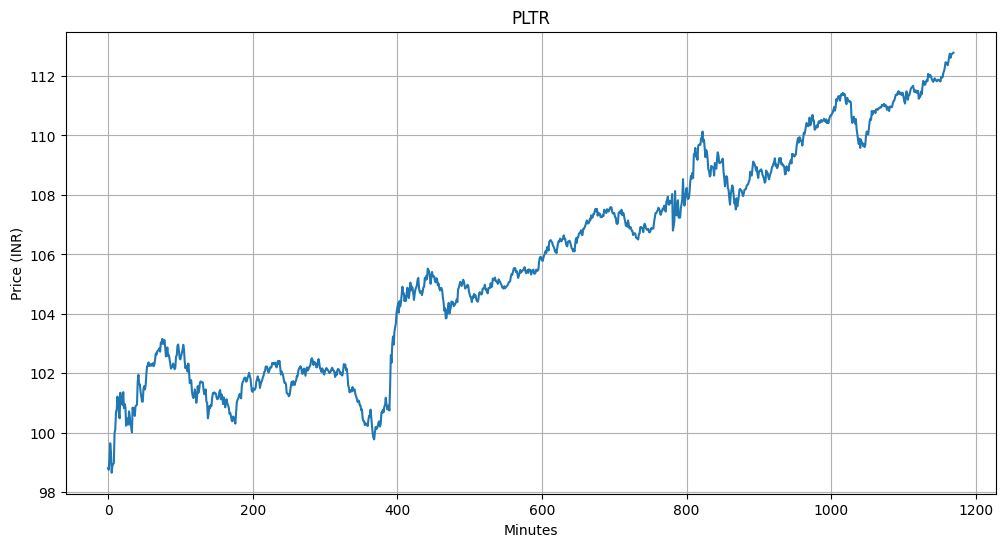

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(df['close'])
plt.title(f"{ticker}")
plt.xlabel("Minutes")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [7]:
df

,open,low,high,close,volume
0,99.06,98.74,99.06,98.81,5830025
1,98.80,98.71,98.80,98.76,1003195
2,98.92,98.74,99.37,99.14,879780
3,99.15,99.05,99.70,99.65,1150531
4,99.63,99.21,99.84,99.36,793158
...,...,...,...,...,...
1165,112.75,112.44,112.80,112.61,489645
1166,112.61,112.60,112.75,112.72,318242
1167,112.73,112.71,112.82,112.74,398510
1168,112.73,112.71,112.80,112.77,468942


# Plotting moving averages of 100 day

---



In [8]:
ma100 = df.close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1165    111.5584
1166    111.5764
1167    111.5945
1168    111.6127
1169    111.6311
Name: close, Length: 1170, dtype: float64

Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

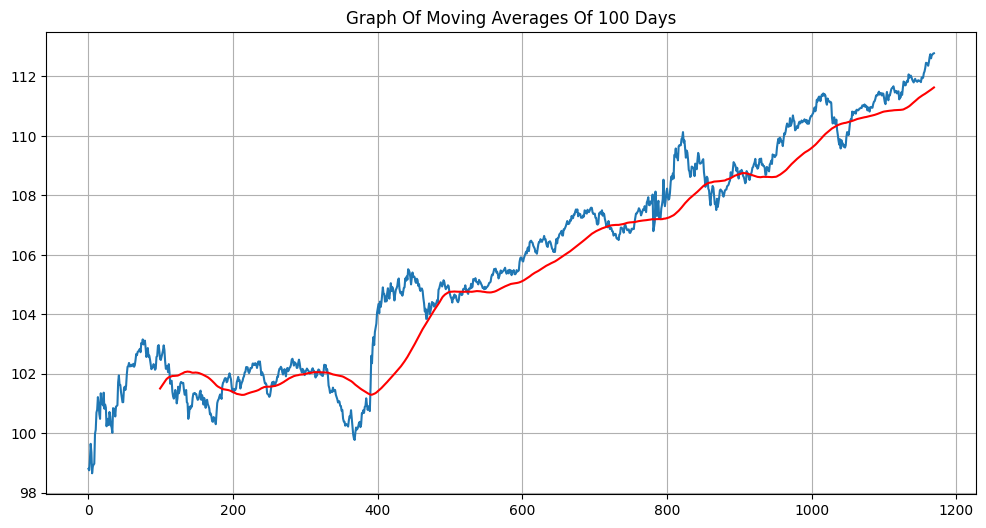

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [10]:
ma200 = df.close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
1165    111.07075
1166    111.08225
1167    111.09435
1168    111.10665
1169    111.11890
Name: close, Length: 1170, dtype: float64

Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

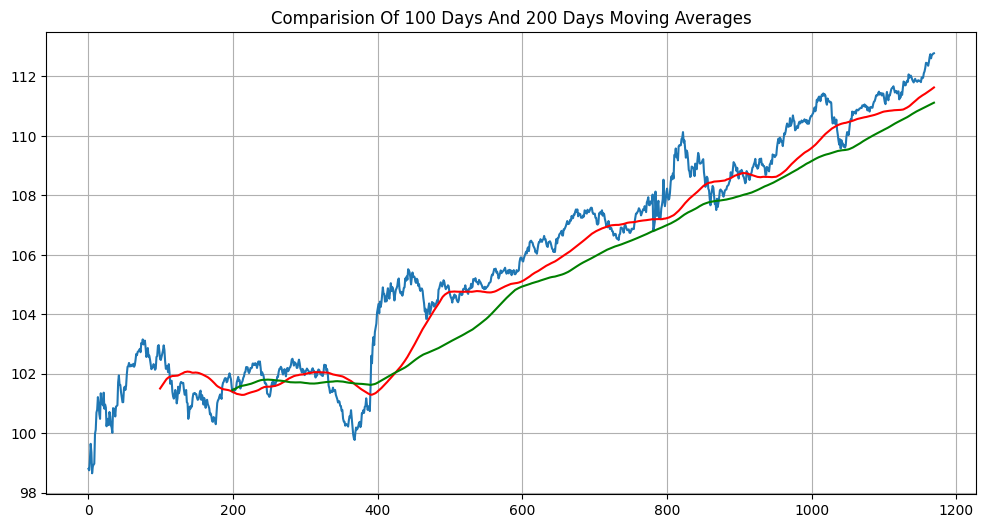

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [12]:
df.shape

(1170, 5)

# Spliting the dataset into training (70%) and testing (30%) set

In [13]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(819, 6)
(351, 6)


In [14]:
train.head()

,date,open,low,high,close,volume
0,2025-04-23 09:30:00,99.06,98.74,99.06,98.81,5830025
1,2025-04-23 09:31:00,98.80,98.71,98.80,98.76,1003195
2,2025-04-23 09:32:00,98.92,98.74,99.37,99.14,879780
3,2025-04-23 09:33:00,99.15,99.05,99.70,99.65,1150531
4,2025-04-23 09:34:00,99.63,99.21,99.84,99.36,793158


In [15]:
test.head()

,date,open,low,high,close,volume
819,2025-04-25 10:09:00,109.65,109.61,109.96,109.69,506669
820,2025-04-25 10:10:00,109.69,109.57,110.18,109.90,926623
821,2025-04-25 10:11:00,109.87,109.74,110.04,109.94,384366
822,2025-04-25 10:12:00,109.94,109.94,110.19,110.13,399968
823,2025-04-25 10:13:00,110.16,109.77,110.17,109.78,422295


# Using MinMax scaler for normalization of the dataset

---



In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [18]:
train_close

array([[ 98.81],
       [ 98.76],
       [ 99.14],
       [ 99.65],
       [ 99.36],
       [ 98.66],
       [ 98.89],
       [ 98.95],
       [ 98.98],
       [ 99.99],
       [100.12],
       [100.7 ],
       [100.8 ],
       [101.22],
       [100.98],
       [100.65],
       [100.49],
       [101.35],
       [100.99],
       [101.06],
       [100.94],
       [101.37],
       [100.83],
       [100.97],
       [100.87],
       [100.24],
       [100.49],
       [100.29],
       [100.28],
       [100.72],
       [100.57],
       [100.27],
       [100.2 ],
       [100.02],
       [100.85],
       [100.69],
       [100.83],
       [100.57],
       [100.9 ],
       [100.92],
       [100.95],
       [101.72],
       [101.95],
       [101.63],
       [101.63],
       [101.38],
       [101.21],
       [101.05],
       [101.05],
       [101.49],
       [101.57],
       [101.46],
       [101.6 ],
       [101.99],
       [102.24],
       [102.26],
       [102.37],
       [102.25],
       [102.26

In [19]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.01359927],
       [0.00906618],
       [0.04351768],
       [0.08975521],
       [0.06346328],
       [0.        ],
       [0.02085222],
       [0.02629193],
       [0.02901179],
       [0.12058024],
       [0.13236627],
       [0.18495014],
       [0.19401632],
       [0.23209429],
       [0.21033545],
       [0.18041704],
       [0.16591115],
       [0.24388033],
       [0.21124207],
       [0.2175884 ],
       [0.20670898],
       [0.24569356],
       [0.19673617],
       [0.20942883],
       [0.20036265],
       [0.14324569],
       [0.16591115],
       [0.14777879],
       [0.14687217],
       [0.18676337],
       [0.1731641 ],
       [0.14596555],
       [0.13961922],
       [0.12330009],
       [0.19854941],
       [0.18404352],
       [0.19673617],
       [0.1731641 ],
       [0.2030825 ],
       [0.20489574],
       [0.20761559],
       [0.2774252 ],
       [0.29827743],
       [0.26926564],
       [0.26926564],
       [0.24660018],
       [0.23118767],
       [0.216

In [20]:
x_train = []
y_train = [] 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train) 

In [21]:
x_train.shape

(719, 100, 1)

# ML Model (LSTM)

---



In [22]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [23]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

E0000 00:00:1745729392.606325    2314 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1745729392.607875    2314 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/mnt/d/Code/Machine Learning/quantjl/venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

---



In [25]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - loss: 0.1843 - mean_absolute_error: 0.3561
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - loss: 0.0259 - mean_absolute_error: 0.1322
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - loss: 0.0158 - mean_absolute_error: 0.1002
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - loss: 0.0133 - mean_absolute_error: 0.0897
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - loss: 0.0130 - mean_absolute_error: 0.0886
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 0.0116 - mean_absolute_error: 0.0822
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - loss: 0.0096 - mean_absolute_error: 0.0745
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - loss: 0.0115 - mean_absolute_error: 0.0823
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - loss: 0.0097 - mean_absolute_error: 0.0740
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - loss: 0.0085 - mean_absolute_error: 0.0703
Epoch 11/100
23/23 ━

In [26]:
model.save(f'{ticker}_keras_model.keras')

In [27]:
test_close.shape

(351, 1)

In [28]:
past_100_days = pd.DataFrame(train_close[-100:])
past_100_days

,0
0,107.14
1,106.99
2,106.87
3,106.92
4,106.90
...,...
95,109.38
96,109.18
97,109.65
98,109.69


In [29]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [30]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [31]:
final_df.head()

,0
0,107.14
1,106.99
2,106.87
3,106.92
4,106.90


In [32]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.10191083],
       [0.07802548],
       [0.0589172 ],
       [0.06687898],
       [0.06369427],
       [0.0477707 ],
       [0.04617834],
       [0.02388535],
       [0.03025478],
       [0.03343949],
       [0.03184713],
       [0.0111465 ],
       [0.00636943],
       [0.00796178],
       [0.        ],
       [0.02866242],
       [0.03343949],
       [0.06687898],
       [0.06687898],
       [0.06210191],
       [0.05732484],
       [0.03980892],
       [0.07324841],
       [0.0843949 ],
       [0.07324841],
       [0.0589172 ],
       [0.05254777],
       [0.05573248],
       [0.05732484],
       [0.03980892],
       [0.03821656],
       [0.04617834],
       [0.06050955],
       [0.05732484],
       [0.06210191],
       [0.0589172 ],
       [0.09394904],
       [0.11783439],
       [0.14171975],
       [0.14171975],
       [0.14968153],
       [0.15605096],
       [0.17038217],
       [0.16401274],
       [0.15286624],
       [0.13216561],
       [0.1433121 ],
       [0.152

In [33]:
input_data.shape

(451, 1)

# Testing the model

---



In [34]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [35]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(351, 100, 1)
(351,)


# Making prediction and plotting the graph of predicted vs actual values

---



In [36]:
# Making predictions

y_pred = model.predict(x_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step


In [37]:
y_pred.shape

(351, 1)

In [38]:
y_test

array([0.50796178, 0.54140127, 0.5477707 , 0.57802548, 0.52229299,
       0.53343949, 0.48407643, 0.4410828 , 0.47929936, 0.46974522,
       0.43152866, 0.37579618, 0.36624204, 0.33757962, 0.34394904,
       0.3933121 , 0.39171975, 0.38694268, 0.38057325, 0.34235669,
       0.40923567, 0.39171975, 0.37898089, 0.42675159, 0.46656051,
       0.45063694, 0.41082803, 0.40923567, 0.41242038, 0.4156051 ,
       0.42675159, 0.43312102, 0.36305732, 0.33121019, 0.28503185,
       0.31528662, 0.33917197, 0.33121019, 0.27547771, 0.26592357,
       0.21974522, 0.18630573, 0.24363057, 0.26433121, 0.28980892,
       0.28025478, 0.23566879, 0.19267516, 0.19904459, 0.16082803,
       0.22133758, 0.17675159, 0.19904459, 0.22770701, 0.26592357,
       0.27070064, 0.26433121, 0.2611465 , 0.24522293, 0.23248408,
       0.24681529, 0.26592357, 0.26910828, 0.27070064, 0.28821656,
       0.29140127, 0.29617834, 0.31050955, 0.31847134, 0.36305732,
       0.3455414 , 0.34235669, 0.37898089, 0.41719745, 0.41082

In [39]:
y_pred

array([[0.43727422],
       [0.4399542 ],
       [0.44270542],
       [0.44574374],
       [0.44935387],
       [0.4533162 ],
       [0.45736426],
       [0.46097928],
       [0.46354395],
       [0.46489626],
       [0.46504664],
       [0.46397656],
       [0.46153185],
       [0.45741016],
       [0.45131022],
       [0.44329497],
       [0.43349302],
       [0.42241585],
       [0.41082394],
       [0.39935035],
       [0.38806677],
       [0.3777092 ],
       [0.36857954],
       [0.36071143],
       [0.35428464],
       [0.34961188],
       [0.3468098 ],
       [0.34536165],
       [0.34480107],
       [0.344784  ],
       [0.34506777],
       [0.34553888],
       [0.34616733],
       [0.34665293],
       [0.34632668],
       [0.34456077],
       [0.3410421 ],
       [0.3358842 ],
       [0.3298758 ],
       [0.32362202],
       [0.3174315 ],
       [0.3106397 ],
       [0.30274165],
       [0.29303658],
       [0.2820301 ],
       [0.2708445 ],
       [0.26068318],
       [0.251

In [40]:
scaler.scale_

array([0.15923567])

In [41]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

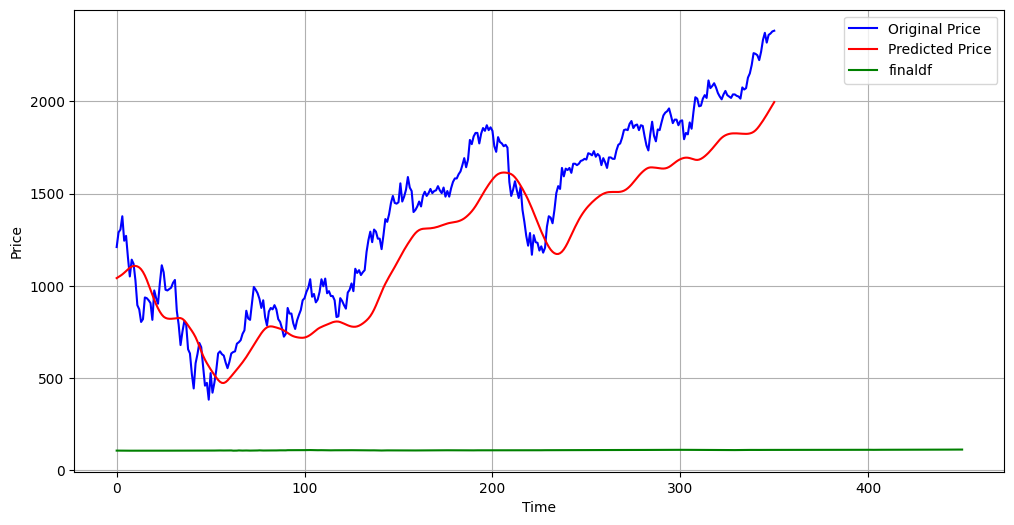

In [42]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.plot(final_df, 'g', label="finaldf")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Model evaluation

Calculation of mean absolute error

In [43]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 15.32%


Calculation of R2 score

In [44]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.7578228710275499


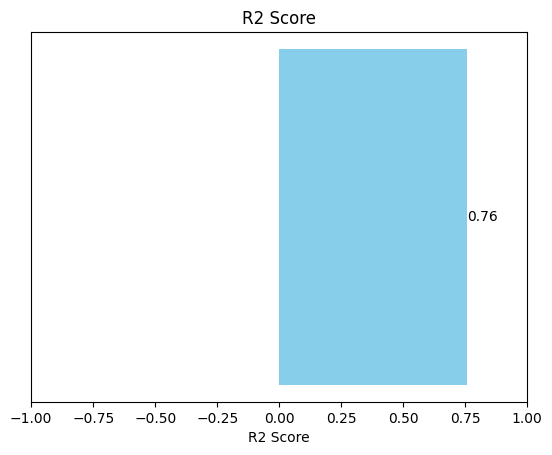

In [45]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

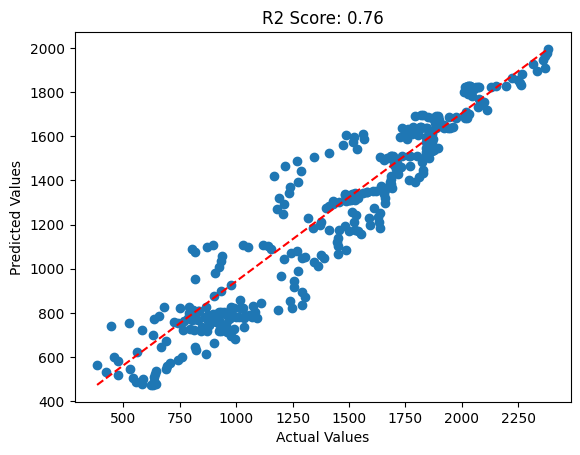

In [46]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()